In [1]:
import numpy as np
from MCMC_routines import MC_model,galaxy_template

# Set the galaxy template:  
Default values are
   - <b> Sigma_SFR  </b> = 2.0 M$_{\odot}$/yr/kpc$^2$ 
   - <b> Sigma_CII  </b> = 3e7 L$_{\odot}$/kpc$^2$ 
   - <b> Sigma_OIII </b> = 7e7 L$_{\odot}$/kpc$^2$ 
   
stadandard assumed error is 20%

In [2]:
galaxy_example = galaxy_template()
galaxy_example.print_info()

Galaxy input data
  Sigma_SFR         =  2.0 Msun/yr/kpc^2
  Sigma_CII         =  30000000.0 Lsun/kpc^2
  Sigma_OIII        =  70000000.0 Lsun/kpc^2
  relative error on Delta       =  20.0 %
  relative error on Sigma_CIII  =  20.0 %
  relative error on Sigma_OIII  =  20.0 %


You can change your inputs and relative errors as follows

In [3]:
galaxy_example.set_data(Sigma_SFR=3.2, Sigma_CII=3e7, Sigma_OIII=4.5e7)
galaxy_example.set_relative_errors(rel_err_Sigma_CII=0.3, rel_err_Sigma_OIII=0.3, rel_err_Delta=0.3)

# Set up the MCMC details

There are 3 kind of parameters:

   - priors
   - walker initial position
   - MCMC hyperparameters

these can be set at initialization time of `MC_model` or at a later stage, default parameters are adopted if no initialization is provided.

In [4]:
mcr = MC_model()
mcr.print_info()

MC parameters
  n_walkers 10
  steps     200
  burn_in   50
Priors
       0.5 < log(n/cm^-3) <        3.5
      -1.0 < log(k_s)     <        2.5
      -1.5 < log(Z/Z_sun) <        0.0
walkers starting point
  log n  2.0
  log Z  -0.5
  log k  0.3


Set the ranges for the <b> flat priors </b> on log($n$), log($Z$), log($ks$) in the MCMC routines.

The ranges are bound between (`lognMIN, lognMAX`) (`logZMIN, logZMAX`), (`logkMIN, logkMAX`).
You can set the prior ranges as follows:

In [5]:
mcr.set_priors(lognMIN = 1.0, 
               lognMAX= 3.0,
               logZMIN = -2.0, 
               logZMAX= 0., 
               logkMIN = -1, 
               logkMAX= 2.5)

Set the <b> starting point </b>  i.e. the log($n_0$),log($Z_0$),log($k_0$) around which the walkers are initialized

In [6]:
mcr.set_walkers(logn0=2.0,
                logZ0=-0.7,
                logk0 = 0.3)

Set the MCMC <b>hyperparameters</b>. For further details on the meaning of these parameters, 
please have a look at the emcee documentation at https://emcee.readthedocs.io/en/stable/
- <b> n_walkers </b> i.e. the the number of walkers
- <b> steps </b> i.e. the number of steps for each walker
- <b> burn_in </b> i.e. the number of initial steps that one may want to discard (the so-called "burn-in")

***Note that the default number of steps is very low (steps =200) and must be changed by the user.***

In [7]:
mcr.set_mc_parameters(
        n_walkers = 10,
        steps     = 10000,
        burn_in   = 100
        )

Print out your settings

In [8]:
mcr.print_info()

MC parameters
  n_walkers 10
  steps     10000
  burn_in   100
Priors
       1.0 < log(n/cm^-3) <        3.0
        -1 < log(k_s)     <        2.5
      -2.0 < log(Z/Z_sun) <        0.0
walkers starting point
  log n  2.0
  log Z  -0.7
  log k  0.3


Input the 'galaxy template data' you have constructed to the MCMC

In [9]:
mcr.set_galaxy_data(galaxy_data = galaxy_example)

# Run the MCMC
Further details on the possibile optimization of the MCMC algorithm and the outputs can be found in the documentation of emcee.

In [10]:
flat_samples = mcr.run_model(verbose=True)

about to run
MC parameters
  n_walkers 10
  steps     10000
  burn_in   100
Priors
       1.0 < log(n/cm^-3) <        3.0
        -1 < log(k_s)     <        2.5
      -2.0 < log(Z/Z_sun) <        0.0
walkers starting point
  log n  2.0
  log Z  -0.7
  log k  0.3
galaxy data
Galaxy input data
  Sigma_SFR         =  3.2 Msun/yr/kpc^2
  Sigma_CII         =  30000000.0 Lsun/kpc^2
  Sigma_OIII        =  45000000.0 Lsun/kpc^2
  relative error on Delta       =  30.0 %
  relative error on Sigma_CIII  =  30.0 %
  relative error on Sigma_OIII  =  30.0 %


100%|██████████| 10000/10000 [04:11<00:00, 39.78it/s]


# Plot the result
For more information on how to customize the corner plot please refer to: https://corner.readthedocs.io/en/latest/pages/quickstart.html

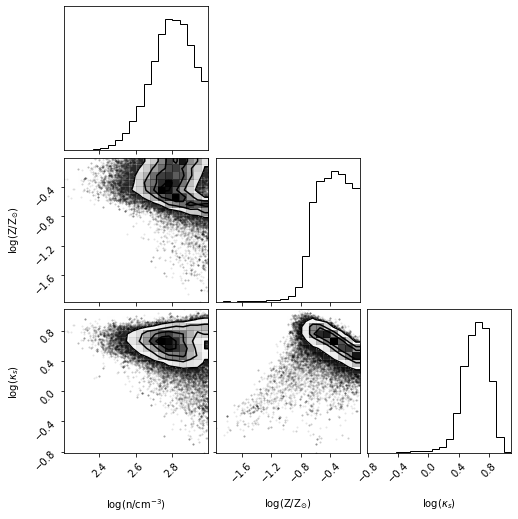

In [11]:
import corner
fig = corner.corner(flat_samples, labels=["log(n/cm$^{-3}$)", "log(Z/Z$_{\odot}$)", "log($\kappa_s$)"])

fig.savefig("test.png")